# Blood exercise: 2025-01-16

The dataset is inspired to the one originated from a study from the Chung-Hua University on blood donation habits in Hsin-Chu city, Taiwan.

The **classification goal** is to predict whether the subjet **has donated or not** on March 2007, based on the following attributes

- *Recency (months)* - months since last donation
- *Frequency (times)* - total number of donation
- *Monetary (c.c. blood)* - total blood donated in c.c.
- *Time (months)* - months since first donation
- *whether he/she donated blood in March 2007*: (**target variable**) binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood)

# Instructions summary
1. Import the training set: *blood_train.csv*
    - Drop the SubjectID column
3. Perform an **exploratory analysis**:
    - Report and discuss the results of the analysis
4. Perform the **required preprocessing steps** and carry out a **classification analysis** aimed at predicting the **target variable** considering the following setting:
    - Create a "dummy" classifier, that is, a baseline that ignore the input features and simply always predicts the most frequent class label in the training set. What are its performance metrics on the training set?
    - Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
        - DecisionTree classifier (set the maximum depth of the tree equal to 3)
        - DecisionTree classifier (set the maximum depth of the tree equal to 3) after oversampling with SMOTE
        - KNearestNeighbor classifier (default params)
        - KNearestNeighbor classifier (default params) after oversampling with SMOTE
    - Report and discuss the results, motivating the choice of the most suitable model
6. Evaluate and discuss results on the test set:
    - Train the selected model on the training set: *blood_train.csv*
    - Import the test set: *blood_test.csv*
    - Report and discuss the results on the test set

# 1. Import the training set: *blood_train.csv*
- drop the SubjectID column


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("blood_train 1.csv")
df

,SubjectID,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0,2,50,12500,98,1
1,1,0,13,3250,28,1
2,2,1,16,4000,35,1
3,3,2,20,5000,45,1
4,4,1,24,6000,77,0
...,...,...,...,...,...,...
668,743,23,2,500,38,0
669,744,21,2,500,52,0
670,745,23,3,750,62,0
671,746,39,1,250,39,0


In [7]:
df=df.drop("SubjectID", axis=1)
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
668,23,2,500,38,0
669,21,2,500,52,0
670,23,3,750,62,0
671,39,1,250,39,0


After having dropped "ID" column we have
- **673** observations
- **5** attributes

# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



In [10]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,673.000000,673.000000,673.000000,673.000000,673.000000
mean,9.526003,5.542348,1385.586924,34.093611,0.237741
std,8.162942,5.995663,1498.915875,24.302505,0.426017
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000
50%,8.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            673 non-null    int64
 1   Frequency (times)                           673 non-null    int64
 2   Monetary (c.c. blood)                       673 non-null    int64
 3   Time (months)                               673 non-null    int64
 4   whether he/she donated blood in March 2007  673 non-null    int64
dtypes: int64(5)
memory usage: 26.4 KB


Check for **NaN** values

In [13]:
df.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

Check if we have strange values within the attributes

In [15]:
for col in df.columns:
    print(df[col].value_counts())

Recency (months)
2     156
4     138
11     76
14     68
16     58
23     42
21     40
9      19
3      12
1       8
7       8
8       6
12      6
6       5
13      5
5       5
0       4
38      2
15      2
10      2
74      1
39      1
25      1
17      1
20      1
18      1
40      1
35      1
26      1
22      1
72      1
Name: count, dtype: int64
Frequency (times)
1     142
2     104
3      77
4      59
5      54
6      49
7      34
8      25
9      21
11     19
10     14
16     13
12     13
14     12
13      8
15      5
24      3
17      3
19      2
20      2
22      2
34      1
41      1
21      1
26      1
44      1
50      1
43      1
38      1
18      1
23      1
46      1
33      1
Name: count, dtype: int64
Monetary (c.c. blood)
250      142
500      104
750       77
1000      59
1250      54
1500      49
1750      34
2000      25
2250      21
2750      19
2500      14
4000      13
3000      13
3500      12
3250       8
3750       5
6000       3
4250       3
4750       2
5000

## Check for imbalancing in the target variable

In [17]:
df.rename(columns={'whether he/she donated blood in March 2007': 'BinaryStatus'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       673 non-null    int64
 1   Frequency (times)      673 non-null    int64
 2   Monetary (c.c. blood)  673 non-null    int64
 3   Time (months)          673 non-null    int64
 4   BinaryStatus           673 non-null    int64
dtypes: int64(5)
memory usage: 26.4 KB


In [18]:
df["BinaryStatus"].value_counts(normalize=True)

BinaryStatus
0    0.762259
1    0.237741
Name: proportion, dtype: float64

The target variable is imbalanced toward the **0** values (negative value) namely "not donating blood"

## INDEPENDENT variables

In [21]:
X=df.drop("BinaryStatus", axis=1)
X

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
668,23,2,500,38
669,21,2,500,52
670,23,3,750,62
671,39,1,250,39


- **HISTOGRAMS**

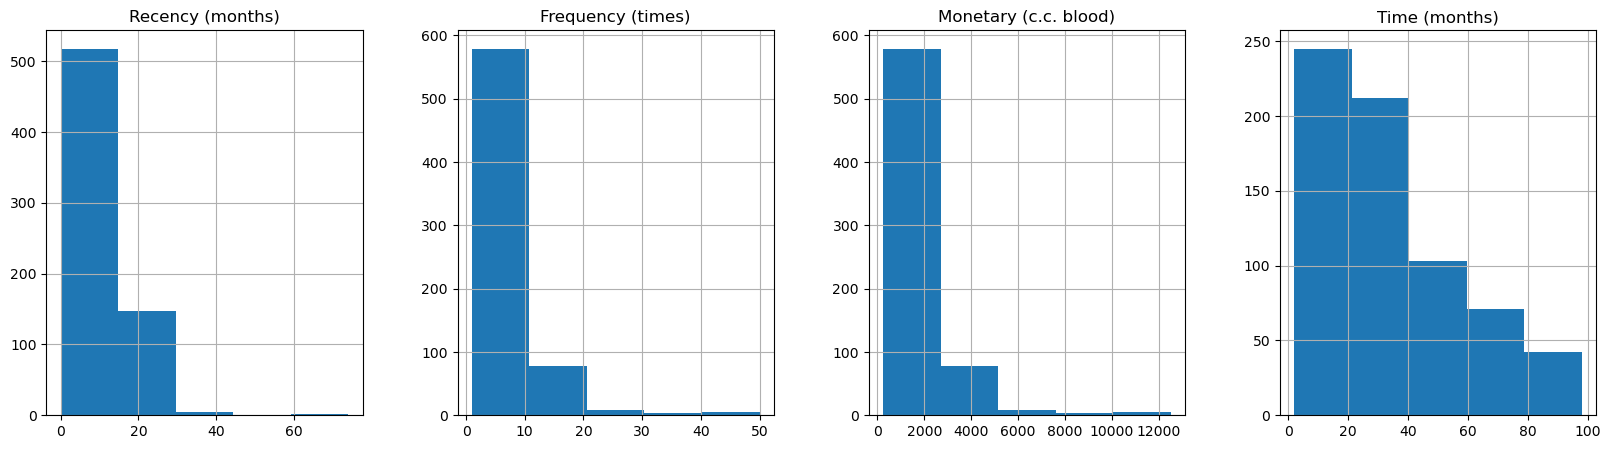

In [23]:
df.drop("BinaryStatus", axis=1).hist(bins = 5,
         layout = (1, 4),
         figsize = (20, 5))
plt.show()

- **BOXPLOT**

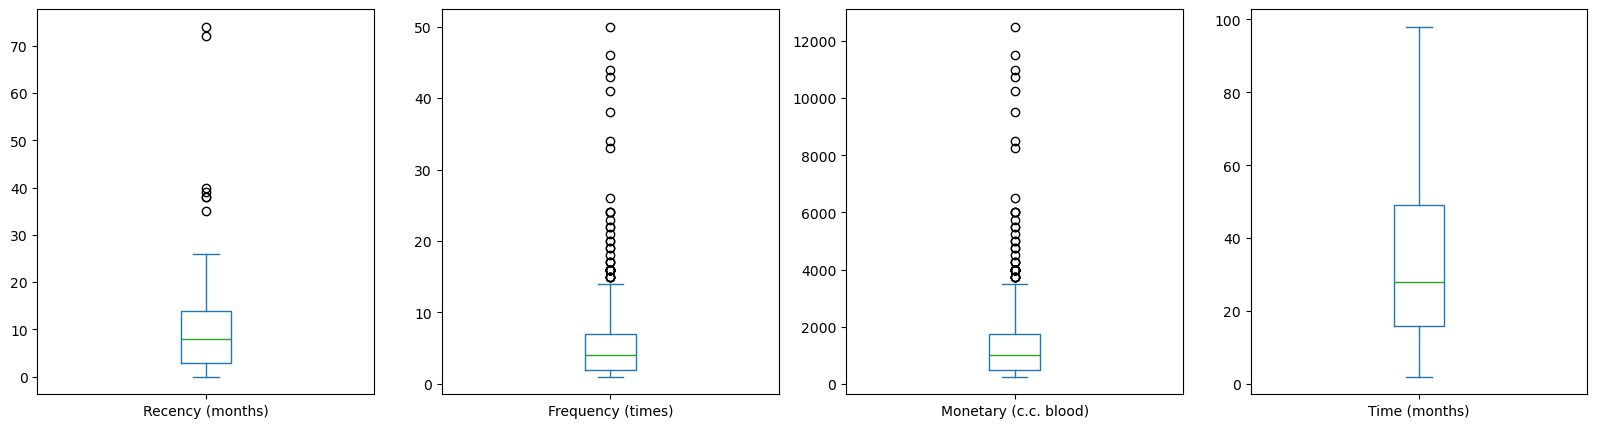

In [25]:
df.drop('BinaryStatus', axis = 1).plot(kind ='box', subplots = True, figsize = (20, 5), layout = (1, 4),sharey = False)
plt.show()

- **CORRELATION MATRIX**

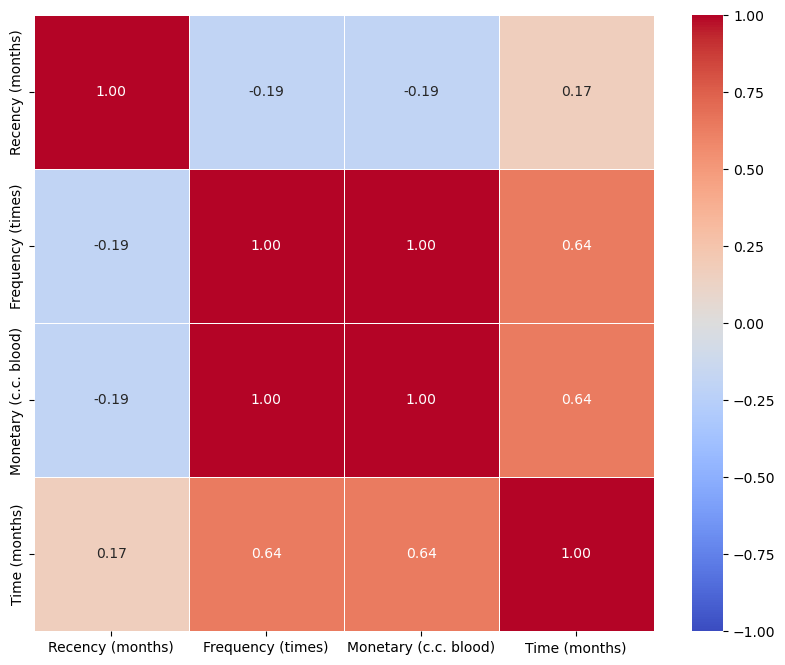

In [27]:
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df.drop('BinaryStatus', axis = 1).corr(),  #2D DATA we want to use (Correlation Matrix)
            annot = True,                            #IF TRUE write the HeatMap with the numerical value within the cells
            linewidths = .5,                         #The WIDTH of the LINES that divide each square
            fmt = '.2f',                             #FORMATTING the text within the cells; in this case '.2f' we have 2 decimals; it is used when "annot=True"
            ax = ax,                                 #The AXIS where to plot the heatmap
            vmin = -1,                               #MIN value for the colors in the heatmap
            vmax = 1,                                #MAX value for the colors in the heatmap
            cmap = "coolwarm")                       #COLORMAP to use
plt.show()

We have a perfect correlation between **"Frequency (times)"** and **"Monetary (c.c. blood)"** so we can decide to drop one of the two columns.

We are going to drop **"Frequency (times)"**

In [29]:
df_corr=df.drop("Frequency (times)", axis=1).copy()
df_corr

,Recency (months),Monetary (c.c. blood),Time (months),BinaryStatus
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
668,23,500,38,0
669,21,500,52,0
670,23,750,62,0
671,39,250,39,0


In [30]:
X_corr=df_corr.drop("BinaryStatus", axis=1)

## DEFINE "y"

In [32]:
y=df["BinaryStatus"]
y.value_counts()

BinaryStatus
0    513
1    160
Name: count, dtype: int64

# 3. Perform the **required preprocessing steps** and carry out a **classification analysis** aimed at predicting the **target variable** considering the following setting:
- Create a "dummy" classifier, that is, a baseline that ignore the input features and simply always predicts the most frequent class label in the training set. What are its performance metrics on the training set?
- Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
    - DecisionTree classifier (set the maximum depth of the tree equal to 3)
    - DecisionTree classifier (set the maximum depth of the tree equal to 3) after oversampling with SMOTE
    - KNearestNeighbor classifier (default params)
    - KNearestNeighbor classifier (default params) after oversampling with SMOTE
- Report and discuss the results, motivating the choice of the most suitable model

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, f1_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 123)

In [35]:
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]
        y_tr = y.values[train]
        X_val = X.values[val]
        y_val = y.values[val]
        pipeline.fit(X_tr, y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True, zero_division = np.nan)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k: v for k, v in cr.items() if k != 'accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean()

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg 

### **DUMMY CLASSIFIER**

In [37]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

acc: 0.7622475856014048


,0,1,macro avg,weighted avg
f1-score,0.865085,0.0,0.432542,0.659410
precision,0.762248,NaN,0.762248,0.762248
recall,1.000000,0.0,0.500000,0.762248
support,51.300000,16.0,67.300000,67.300000


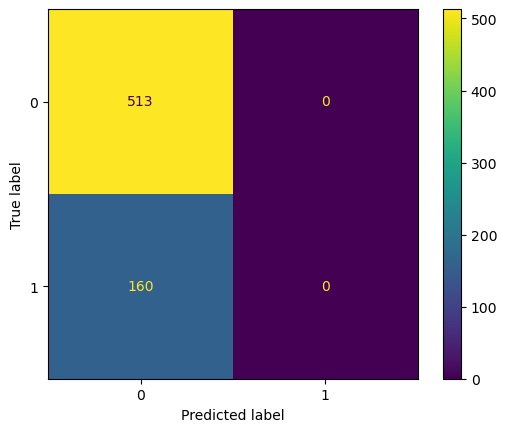

In [38]:
estimators = [('clf', dummy_clf)]
pipe=Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe, X_corr, y)
print("acc:", acc)
display(df_metrics)
y_pred= cross_val_predict(pipe, X_corr, y, cv = skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred, values_format='')
plt.show()

In [39]:
dum = cross_val_score(pipe, X_corr, y, scoring = make_scorer(f1_score), cv = skf) 
dum, dum.mean()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0.0)

## DECISION TREE

acc: 0.7817164179104477


,0,1,macro avg,weighted avg
f1-score,0.862916,0.447072,0.654994,0.764036
precision,0.826094,0.577821,0.701957,0.767185
recall,0.906787,0.381250,0.644019,0.781716
support,51.300000,16.000000,67.300000,67.300000


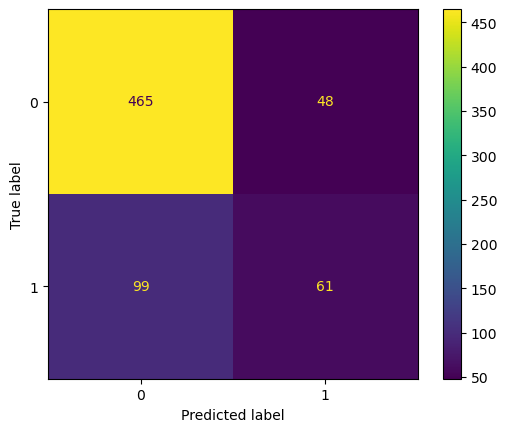

In [41]:
estimators = [('clf', DecisionTreeClassifier(random_state = 123,  max_depth = 3))]
pipe=Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe, X_corr, y)
print("acc:", acc)
display(df_metrics)
y_pred= cross_val_predict(pipe, X_corr, y, cv = skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred, values_format='')
plt.show()

In [42]:
dt = cross_val_score(pipe, X_corr, y, scoring = make_scorer(f1_score), cv = skf) 
dt, dt.mean()

(array([0.33333333, 0.4137931 , 0.55      , 0.32      , 0.56      ,
        0.61538462, 0.4       , 0.41666667, 0.46153846, 0.4       ]),
 0.44707161803713535)

## DECISION TREE with SMOTE

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

acc: 0.6330333625987709


,0,1,macro avg,weighted avg
f1-score,0.710052,0.484967,0.59751,0.656535
precision,0.884121,0.370020,0.62707,0.761913
recall,0.602451,0.731250,0.66685,0.633033
support,51.300000,16.000000,67.30000,67.300000


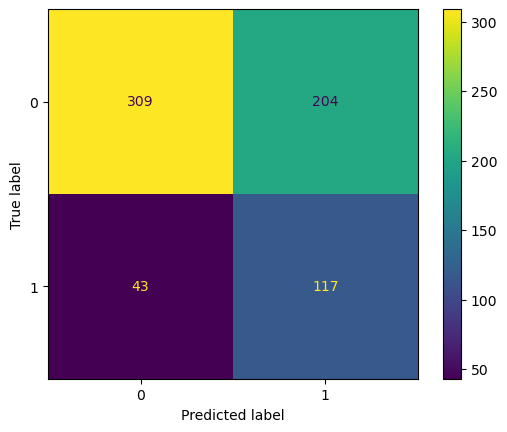

In [45]:
estimators = [('smote', SMOTE(random_state=123)),('clf', DecisionTreeClassifier(random_state = 123,  max_depth = 3))]
pipe=ImbPipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe, X_corr, y)
print("acc:", acc)
display(df_metrics)
y_pred= cross_val_predict(pipe, X_corr, y, cv = skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred, values_format='')
plt.show()

In [46]:
dt_smote = cross_val_score(pipe, X_corr, y, scoring = make_scorer(f1_score), cv = skf) 
dt_smote, dt_smote.mean()

(array([0.43478261, 0.44      , 0.56603774, 0.42105263, 0.47058824,
        0.51851852, 0.36363636, 0.47826087, 0.58536585, 0.57142857]),
 0.4849671388224981)

## KNN

Before applying KNN we should perform a **StandardScaler()** in order to have all the data within the same range

acc: 0.7742537313432836


,0,1,macro avg,weighted avg
f1-score,0.858651,0.42962,0.644135,0.756605
precision,0.819985,0.55616,0.688072,0.757365
recall,0.902866,0.36250,0.632683,0.774254
support,51.300000,16.00000,67.300000,67.300000


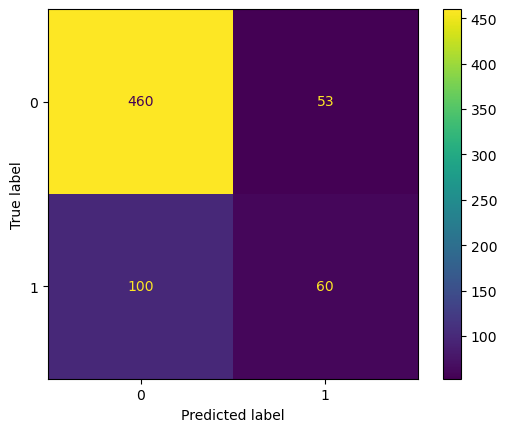

In [48]:
estimators = [('scaler', StandardScaler()),('clf', KNeighborsClassifier())]
pipe=Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe, X_corr, y)
print("acc:", acc)
display(df_metrics)
y_pred= cross_val_predict(pipe, X_corr, y, cv = skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred, values_format='')
plt.show()

In [49]:
knn = cross_val_score(pipe, X_corr, y, scoring = make_scorer(f1_score), cv = skf) 
knn, knn.mean()

(array([0.4       , 0.53333333, 0.45714286, 0.33333333, 0.36363636,
        0.61538462, 0.35714286, 0.37037037, 0.53846154, 0.4       ]),
 0.43688052688052686)

## KNN with SMOTE

acc: 0.7088235294117647


,0,1,macro avg,weighted avg
f1-score,0.797612,0.476281,0.636946,0.721195
precision,0.848092,0.417005,0.632549,0.745625
recall,0.754563,0.562500,0.658531,0.708824
support,51.300000,16.000000,67.300000,67.300000


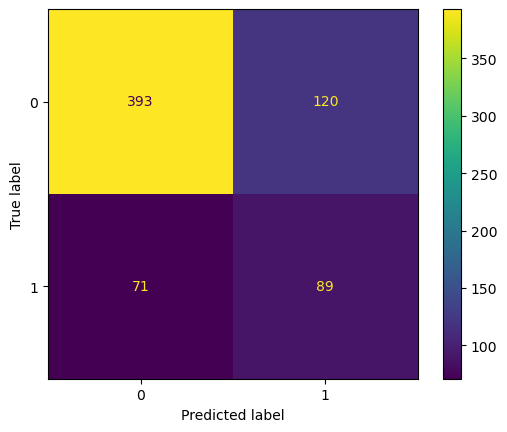

In [51]:
estimators = [('scaler', StandardScaler()),('sampling', SMOTE(random_state=123)),('clf', KNeighborsClassifier())]
pipe=ImbPipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe, X_corr, y)
print("acc:", acc)
display(df_metrics)
y_pred= cross_val_predict(pipe, X_corr, y, cv = skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred, values_format='')
plt.show()

In [52]:
knn_smote = cross_val_score(pipe, X_corr, y, scoring = make_scorer(f1_score), cv = skf) 
knn_smote, knn_smote.mean()

(array([0.35897436, 0.54054054, 0.55813953, 0.46153846, 0.54054054,
        0.57894737, 0.37837838, 0.375     , 0.48484848, 0.52941176]),
 0.48063194328314207)

- **PRECISION:** applying the *OverSampling* method **SMOTE** to both KNN and DT **decrease** the precision compared to the same algorithms without SMOTE
- **RECALL:** applying the *OverSampling* method **SMOTE** to both KNN and DT **increase** the recall compared to the same algorithms without SMOTE
- **F1-SCORE:** applying the *OverSampling* method **SMOTE** to both KNN and DT seems to **slightly increase** the f1-score compared to the same algorithms without SMOTE

## EVALUATE the performances of the models

In [55]:
df_res=pd.DataFrame({"dt":dt,
                     "dt_smote":dt_smote,
                     "knn":knn,
                     "knn_smote":knn_smote})
df_res

,dt,dt_smote,knn,knn_smote
0,0.333333,0.434783,0.400000,0.358974
1,0.413793,0.440000,0.533333,0.540541
2,0.550000,0.566038,0.457143,0.558140
3,0.320000,0.421053,0.333333,0.461538
4,0.560000,0.470588,0.363636,0.540541
5,0.615385,0.518519,0.615385,0.578947
6,0.400000,0.363636,0.357143,0.378378
7,0.416667,0.478261,0.370370,0.375000
8,0.461538,0.585366,0.538462,0.484848
9,0.400000,0.571429,0.400000,0.529412


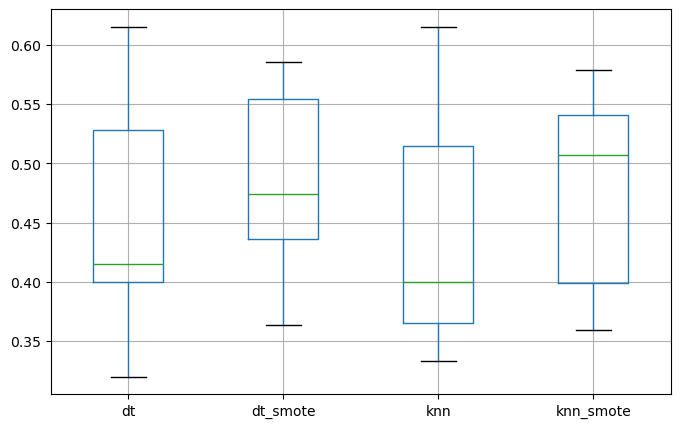

In [56]:
df_res.boxplot(figsize=(8,5))
plt.show()

In [57]:
df_res.mean(axis=0)

dt           0.447072
dt_smote     0.484967
knn          0.436881
knn_smote    0.480632
dtype: float64

Keeping "F1_score" as the metric that we use to evaluate the perfomances of the model we observe that **"knn_smote"** provide us the best performance

We should check if there is a statistical difference between the performances of the models

In [59]:
from scipy.stats import wilcoxon

In [60]:
for col in df_res.columns[:-1]:
    print(f"({col} -- knn_smote) --> {wilcoxon(df_res[col], df_res['knn_smote'])}")

(dt -- knn_smote) --> WilcoxonResult(statistic=18.0, pvalue=0.375)
(dt_smote -- knn_smote) --> WilcoxonResult(statistic=25.0, pvalue=0.845703125)
(knn -- knn_smote) --> WilcoxonResult(statistic=15.0, pvalue=0.232421875)


Given the confidence level $\alpha = 0.05 $, we can conclude that
- As ***p*-value $ > \alpha$** for **"(dt -- knn_smote)"**, **"(dt_smote -- knn_smote)"** and **"(knn -- knn_smote)"** the null hypothesis that the two related paired samples come from the same distribution with the same median **can't be rejected**.

# 4. Evaluate and discuss results on the test set:
- Train the selected model on the training set: *blood_train.csv*
- Import the test set: *blood_test.csv*
- Report and discuss the results on the test set

In [63]:
sample=pd.read_csv("blood_test 1.csv")
sample

,SubjectID,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,26,4,6,1500,14,0
1,42,2,5,1250,16,1
2,68,4,7,1750,25,0
3,88,4,2,500,4,0
4,95,4,7,1750,28,0
...,...,...,...,...,...,...
70,720,21,3,750,38,0
71,721,23,3,750,35,0
72,728,21,1,250,21,0
73,734,23,1,250,23,0


In [64]:
sample=sample.drop("SubjectID", axis=1)
sample

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,4,6,1500,14,0
1,2,5,1250,16,1
2,4,7,1750,25,0
3,4,2,500,4,0
4,4,7,1750,28,0
...,...,...,...,...,...
70,21,3,750,38,0
71,23,3,750,35,0
72,21,1,250,21,0
73,23,1,250,23,0


In [65]:
sample.rename(columns={'whether he/she donated blood in March 2007': 'BinaryStatus'}, inplace=True)
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       75 non-null     int64
 1   Frequency (times)      75 non-null     int64
 2   Monetary (c.c. blood)  75 non-null     int64
 3   Time (months)          75 non-null     int64
 4   BinaryStatus           75 non-null     int64
dtypes: int64(5)
memory usage: 3.1 KB


In [66]:
sample_corr=sample.drop("Frequency (times)", axis=1)
sample_corr

,Recency (months),Monetary (c.c. blood),Time (months),BinaryStatus
0,4,1500,14,0
1,2,1250,16,1
2,4,1750,25,0
3,4,500,4,0
4,4,1750,28,0
...,...,...,...,...
70,21,750,38,0
71,23,750,35,0
72,21,250,21,0
73,23,250,23,0


## DEFINE **"X_sample_corr"** as "X" and **"y_sample"** as "y"

In [68]:
X_sample_corr=sample_corr.drop("BinaryStatus", axis=1)
y_sample=sample["BinaryStatus"]
X_sample_corr, y_sample

(    Recency (months)  Monetary (c.c. blood)  Time (months)
 0                  4                   1500             14
 1                  2                   1250             16
 2                  4                   1750             25
 3                  4                    500              4
 4                  4                   1750             28
 ..               ...                    ...            ...
 70                21                    750             38
 71                23                    750             35
 72                21                    250             21
 73                23                    250             23
 74                23                    250             23
 
 [75 rows x 3 columns],
 0     0
 1     1
 2     0
 3     0
 4     0
      ..
 70    0
 71    0
 72    0
 73    0
 74    0
 Name: BinaryStatus, Length: 75, dtype: int64)

We are going to use **KNN_smote** as the classifier

In [70]:
def prediction(pipeline, X, y,sample):
    pred_list=[]
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.iloc[train]
        y_tr = y.iloc[train]
        pipeline.fit(X_tr, y_tr)
        y_pred =pipeline.predict(sample)
        pred_list.append(y_pred)
    return pred_list

In [71]:
estimators = [('scaler', StandardScaler()),('sampling', SMOTE()),('clf', KNeighborsClassifier())]
pipe=ImbPipeline(estimators)
pred_list= list(prediction(pipe, X_corr, y, X_sample_corr))

The code below is enough for the metrics we need for the "test set"

In [85]:
classification_report(y_sample, new_list, output_dict = True, zero_division = np.nan)

{'0': {'precision': 0.7666666666666667,
  'recall': 0.8070175438596491,
  'f1-score': 0.7863247863247863,
  'support': 57.0},
 '1': {'precision': 0.26666666666666666,
  'recall': 0.2222222222222222,
  'f1-score': 0.24242424242424243,
  'support': 18.0},
 'accuracy': 0.6666666666666666,
 'macro avg': {'precision': 0.5166666666666667,
  'recall': 0.5146198830409356,
  'f1-score': 0.5143745143745144,
  'support': 75.0},
 'weighted avg': {'precision': 0.6466666666666666,
  'recall': 0.6666666666666666,
  'f1-score': 0.6557886557886557,
  'support': 75.0}}

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Upload the following files in MS Teams Assignment:
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
